In [1]:
import numpy as np
import pandas as pd
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
mat = scipy.io.loadmat('YaleB_32x32.mat')

In [3]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Wed Jun 13 16:18:43 2007',
 '__version__': '1.0',
 '__globals__': [],
 'fea': array([[ 82,  81,  72, ...,  35,  33,  22],
        [ 86,  86,  74, ...,  20,  14,   9],
        [ 76,  88,  80, ...,   9,   6,   6],
        ...,
        [  3,   3,   3, ..., 200, 202, 192],
        [  3,   3,   3, ..., 253, 255, 250],
        [  5,   3,   4, ..., 174, 175, 179]],
       shape=(2414, 1024), dtype=uint8),
 'gnd': array([[ 1],
        [ 1],
        [ 1],
        ...,
        [38],
        [38],
        [38]], shape=(2414, 1), dtype=uint8)}

In [4]:
fea = mat['fea']
fea.shape

(2414, 1024)

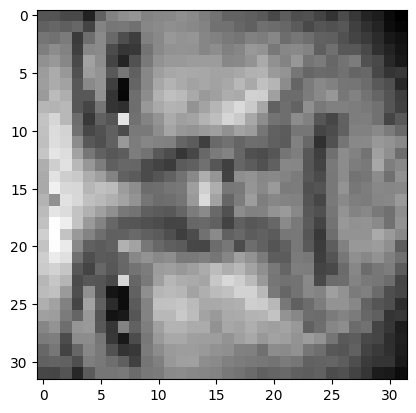

In [5]:
plt.imshow(fea[0].reshape(32,32), cmap='gray')

In [6]:
gnd = mat['gnd']
gnd.shape

(2414, 1)

In [7]:
data = np.concatenate((fea, gnd), axis=1)
data.shape

(2414, 1025)

## 2 Part 2

### 2.1.1

In [8]:
def knn(data, k=1, m=10):
    labels = data[:,-1]
    sel_rows = []
    for label in np.unique(labels):
        label_indices = np.where(labels == label)[0]
        random_indices = np.random.choice(label_indices, size=m, replace=False)
        sel_rows.append(data[random_indices])
    
    trg_data = np.vstack(sel_rows)
    # select the remaining rows
    remain_indices = np.setdiff1d(np.arange(data.shape[0]), sel_rows)
    test_data = data[remain_indices]
    X_train = trg_data[:,:-1]
    X_test = test_data[:, :-1]
    y_train = trg_data[:,-1]
    y_test = test_data[:,-1]
    # Train the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    # Evaluate the classifier
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_error = 1 - accuracy
    err_rate = classification_error * 100
    print(f'Accuracy: {accuracy}')
    print(f'Classification Error : \n {classification_error}')
    return (err_rate) 

In [9]:
error_rate = {}
m = np.array([10,20,30,40,50])
for i in m:
    error_rate[i] = knn(data, k=1, m=i)

Accuracy: 0.5227062094531975
Classification Error : 
 0.47729379054680254
Accuracy: 0.7075996292863763
Classification Error : 
 0.2924003707136237
Accuracy: 0.8178869323447636
Classification Error : 
 0.18211306765523638
Accuracy: 0.8869323447636701
Classification Error : 
 0.11306765523632989
Accuracy: 0.9481000926784059
Classification Error : 
 0.05189990732159411


In [11]:
keys = list(error_rate.keys())
values = list(error_rate.values())

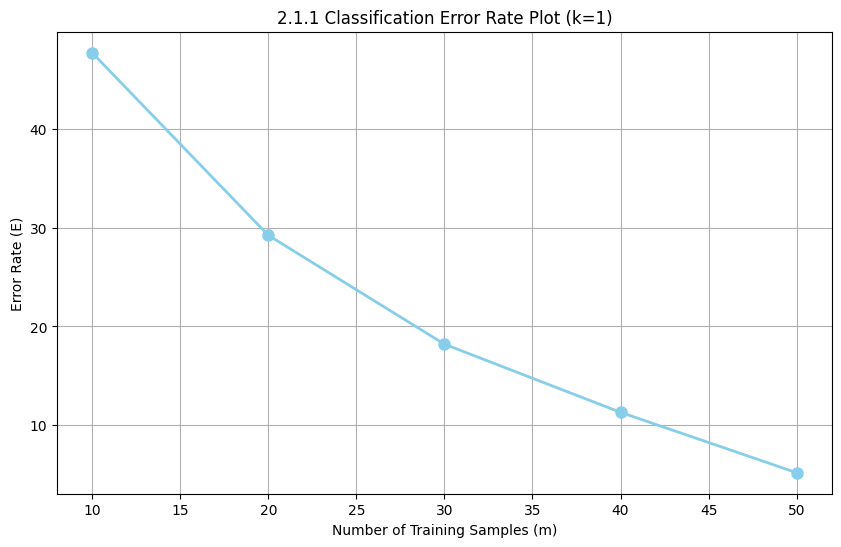

In [12]:
plt.figure(figsize=(10,6))
plt.plot(keys, values, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Number of Training Samples (m)')
plt.ylabel('Error Rate (E)')
plt.title('2.1.1 Classification Error Rate Plot (k=1)')
plt.grid(True)
plt.savefig('error_plot_k1.jpg', bbox_inches='tight')
plt.show()

### 2.1.2

In [13]:
m = np.array([10,20,30,40,50])
k = np.array([2,3,5,10])
E = {}
for i in k:
    E[i]={}
    for j in m:
        E[i][j] =knn(data, k=i, m=j)

Accuracy: 0.39295644114921224
Classification Error : 
 0.6070435588507878
Accuracy: 0.5750695088044485
Classification Error : 
 0.4249304911955515
Accuracy: 0.6746987951807228
Classification Error : 
 0.32530120481927716
Accuracy: 0.7506950880444856
Classification Error : 
 0.2493049119555144
Accuracy: 0.819740500463392
Classification Error : 
 0.18025949953660803
Accuracy: 0.3341056533827618
Classification Error : 
 0.6658943466172382
Accuracy: 0.5449490268767377
Classification Error : 
 0.45505097312326226
Accuracy: 0.654772937905468
Classification Error : 
 0.345227062094532
Accuracy: 0.7354031510658017
Classification Error : 
 0.2645968489341983
Accuracy: 0.8044485634847081
Classification Error : 
 0.19555143651529194
Accuracy: 0.2933271547729379
Classification Error : 
 0.7066728452270621
Accuracy: 0.5018535681186284
Classification Error : 
 0.49814643188137164
Accuracy: 0.6329935125115848
Classification Error : 
 0.36700648748841525
Accuracy: 0.7136237256719185
Classification Err

In [14]:
df = pd.DataFrame.from_dict(E, orient='columns')
df

,2,3,5,10
10,60.704356,66.589435,70.667285,75.115848
20,42.493049,45.505097,49.814643,53.660797
30,32.530120,34.522706,36.700649,41.149212
40,24.930491,26.459685,28.637627,30.583874
50,18.025950,19.555144,21.918443,25.625579


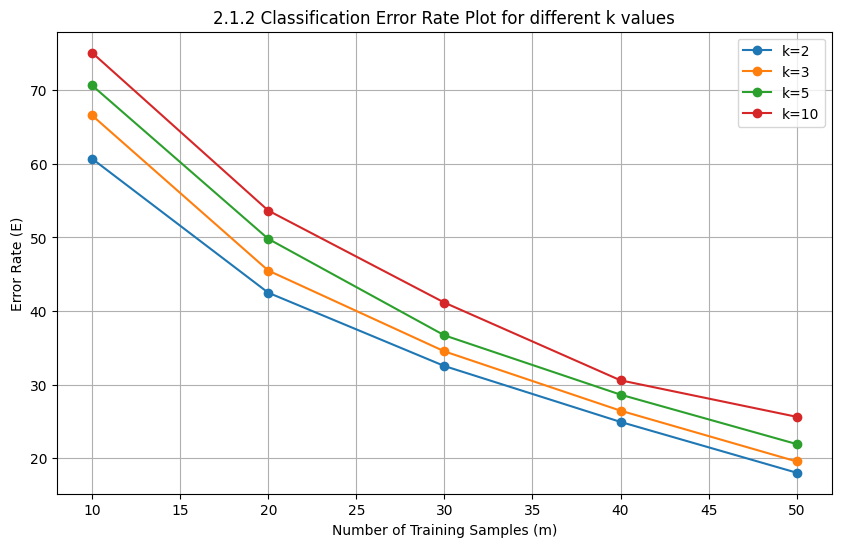

In [25]:
labels = {df.columns[0]:'k=2', df.columns[1]:'k=3', df.columns[2]:'k=5', df.columns[3]:'k=10'}
plt.figure(figsize=(10,6))
plt.plot(df.index, df.loc[:,2], label=labels[df.columns[0]], marker='o')
plt.plot(df.index, df.loc[:,3], label=labels[df.columns[1]], marker='o')
plt.plot(df.index, df.loc[:,5], label=labels[df.columns[2]], marker='o')
plt.plot(df.index, df.loc[:,10],label=labels[df.columns[3]], marker='o')
plt.title('2.1.2 Classification Error Rate Plot for different k values')
plt.xlabel('Number of Training Samples (m)')
plt.ylabel('Error Rate (E)')
plt.legend()
plt.grid()
# plt.savefig('error_plot_k23510.jpg', bbox_inches='tight')
plt.show()

In [19]:
labels = data[:,-1]
sel_rows = []
for label in np.unique(labels):
    label_indices = np.where(labels == label)[0]
    random_indices = np.random.choice(label_indices, size=50, replace=False)
    sel_rows.append(data[random_indices])

trg_data = np.vstack(sel_rows)
# select the remaining rows
remain_indices = np.setdiff1d(np.arange(data.shape[0]), sel_rows)
test_data = data[remain_indices]
X_train = trg_data[:,:-1]
X_test = test_data[:, :-1]
y_train = trg_data[:,-1]
y_test = test_data[:,-1]

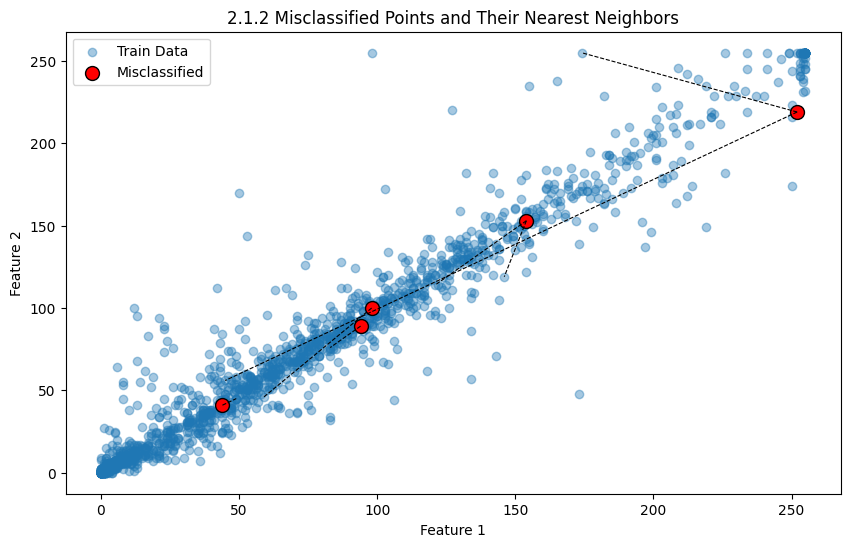

In [20]:
# Find misclassified points for a certain k
knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
knn.fit(X_train, y_train)
# Evaluate the classifier
y_pred = knn.predict(X_test)

# Identify misclassified points
misclassified_mask = (y_pred != y_test)
misclassified_points = X_test[misclassified_mask]

# Randomly choose 10 misclassified points for display
random_idx = np.random.choice(misclassified_points.shape[0], size=5, replace=False)
misclassified_points = misclassified_points[random_idx]
# select 10 misclassified points so that every 100th point is chosen
# misclassified_points = misclassified_points[::100][:10]
nearest_neighbors = knn.kneighbors(misclassified_points, return_distance=False)

# Plot data points
plt.figure(figsize=(10,6))
plt.scatter(X_train[:, 0], X_train[:, 1], alpha=0.4, label="Train Data")
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker="s", cmap='coolwarm', edgecolors='black', label="Test Data")

# Highlight misclassified points
plt.scatter(misclassified_points[:, 0], misclassified_points[:, 1], color='red', edgecolor='black', s=100, label="Misclassified")

# Plot nearest neighbors of misclassified points
for i, neighbors in enumerate(nearest_neighbors):
    for neighbor_idx in neighbors:
        neighbor_point = X_train[neighbor_idx]
        plt.plot([misclassified_points[i, 0], neighbor_point[0]], 
                 [misclassified_points[i, 1], neighbor_point[1]], 
                 'k--', linewidth=0.8)  # Draw dashed lines to neighbors
plt.legend()
plt.title("2.1.2 Misclassified Points and Their Nearest Neighbors")
# Add a caption
# plt.figtext(0.5, -0.05, "Plot shows 5 randomly selected misclassified points and the dotted lines connect to their 2 neighbors for k=2 in the training dataset.", 
            # wrap=True, horizontalalignment='center', fontsize=10)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
# plt.savefig("misclassified_points.jpg", bbox_inches='tight')
plt.show()

In [21]:
nearest_neighbors

array([[1591,  362],
       [ 342,  902],
       [1484,  182],
       [1433, 1691],
       [ 302,  174]])

In [22]:
X_train[nearest_neighbors[0,0]]

array([94, 89, 75, ..., 20, 18, 16], shape=(1024,), dtype=uint8)

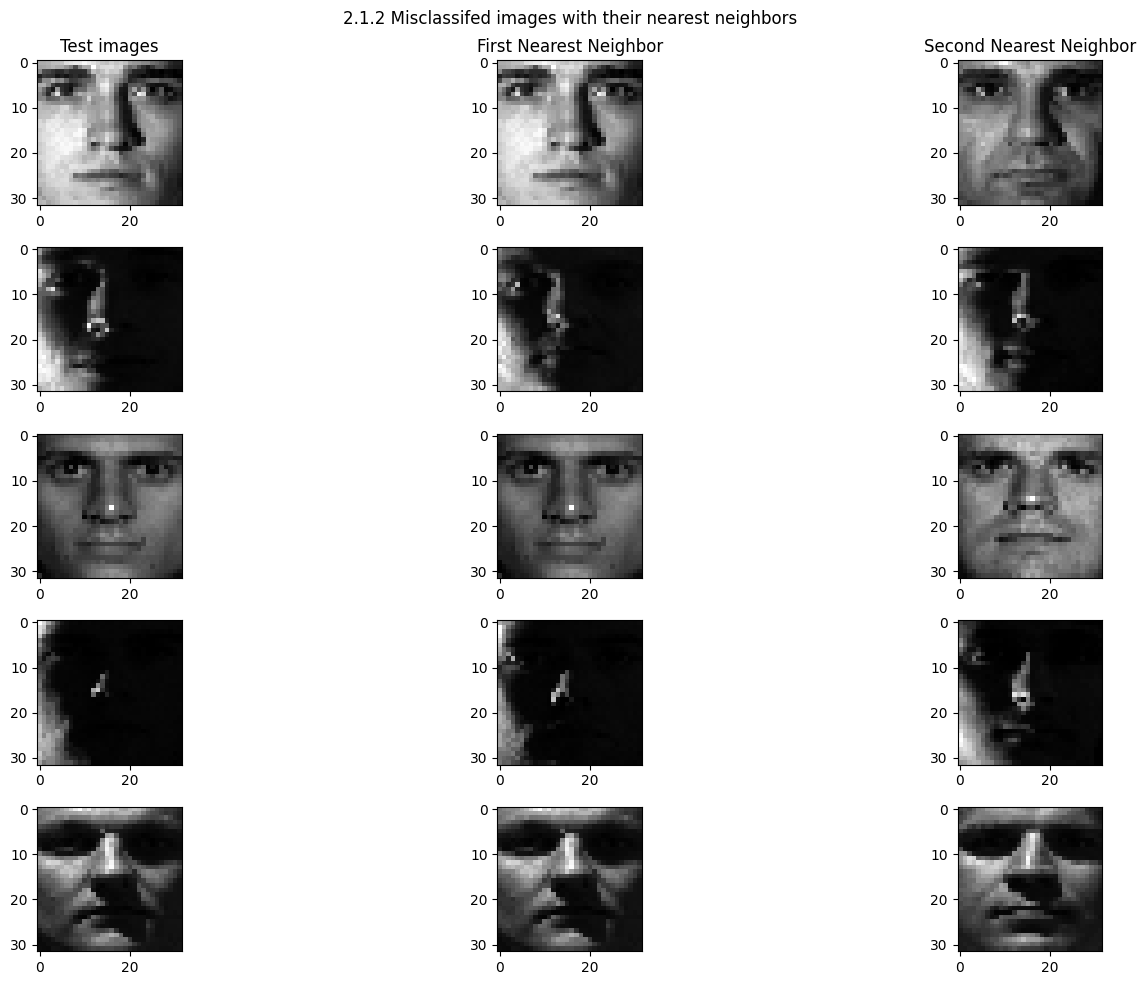

In [23]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(16,10), dpi=100)
for i in range(5):
    ax[i,0].imshow(misclassified_points[i].reshape(32,32).T, cmap='gray')
    ax[i,1].imshow(X_train[nearest_neighbors[i,0]].reshape(32,32).T, cmap='gray')
    ax[i,2].imshow(X_train[nearest_neighbors[i,1]].reshape(32,32).T, cmap='gray')
fig.suptitle("2.1.2 Misclassifed images with their nearest neighbors")
ax[0,0].set_title("Test images")
ax[0,1].set_title("First Nearest Neighbor")
ax[0,2].set_title("Second Nearest Neighbor")
plt.tight_layout()
# fig.savefig("misclassified_images_2.1.2.jpg", bbox_inches='tight')
plt.show()

#### 2.1.3

In [27]:
def knn_norm(data, k=1, m=30, p=2):
    labels = data[:,-1]
    sel_rows = []
    for label in np.unique(labels):
        label_indices = np.where(labels == label)[0]
        random_indices = np.random.choice(label_indices, size=m, replace=False)
        sel_rows.append(data[random_indices])
    
    trg_data = np.vstack(sel_rows)
    # select the remaining rows
    remain_indices = np.setdiff1d(np.arange(data.shape[0]), sel_rows)
    test_data = data[remain_indices]
    X_train = trg_data[:,:-1]
    X_test = test_data[:, :-1]
    y_train = trg_data[:,-1]
    y_test = test_data[:,-1]
    # Train the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=p)
    knn.fit(X_train, y_train)
    # Evaluate the classifier
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_error = 1 - accuracy
    err_rate = classification_error * 100
    print(f'Accuracy: {accuracy}')
    print(f'Classification Error : {classification_error}')
    return (err_rate)

In [28]:
norms = np.array([1, 3, 5, 10])
E = {}
for p in norms:
    E[p] = knn_norm(data, k=3, m=30, p=p)    

Accuracy: 0.7835959221501391
Classification Error : 0.21640407784986093
Accuracy: 0.8470806302131604
Classification Error : 0.15291936978683962
Accuracy: 0.8470806302131604
Classification Error : 0.15291936978683962
Accuracy: 0.8067655236329935
Classification Error : 0.19323447636700652


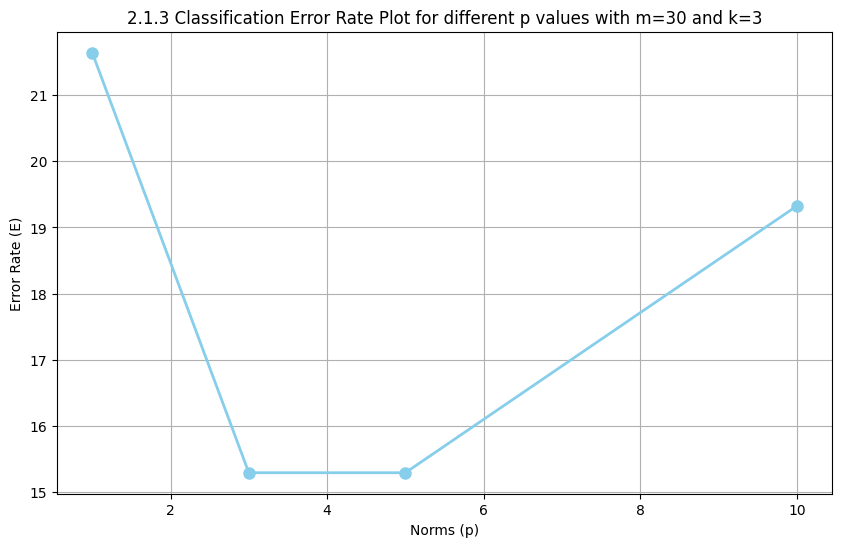

In [30]:
keys = list(E.keys())
values = list(E.values())
plt.figure(figsize=(10,6))
plt.plot(keys, values, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Norms (p)')
plt.ylabel('Error Rate (E)')
plt.title('2.1.3 Classification Error Rate Plot for different p values with m=30 and k=3')
plt.grid(True)
# plt.savefig('error_plot_p_2.1.3.jpg', bbox_inches='tight')
plt.show()

### 2.1.4 Extracting LBP features

In [31]:
img = fea.reshape(2414, 32, 32)

In [32]:
def get_pixel(img, center, x, y): 
      
    new_value = 0
      
    try: 
        # If local neighbourhood pixel  
        # value is greater than or equal 
        # to center pixel values then  
        # set it to 1 
        if img[x][y] >= center: 
            new_value = 1
              
    except: 
        # Exception is required when  
        # neighbourhood value of a center 
        # pixel value is null i.e. values 
        # present at boundaries. 
        pass
      
    return new_value 

In [33]:
# Function for calculating LBP 
def lbp_calculated_pixel(img, x, y): 
   
    center = img[x][y] 
   
    val_ar = [] 
      
    # top_left 
    val_ar.append(get_pixel(img, center, x-1, y-1)) 
      
    # top 
    val_ar.append(get_pixel(img, center, x-1, y)) 
      
    # top_right 
    val_ar.append(get_pixel(img, center, x-1, y + 1)) 
      
    # right 
    val_ar.append(get_pixel(img, center, x, y + 1)) 
      
    # bottom_right 
    val_ar.append(get_pixel(img, center, x + 1, y + 1)) 
      
    # bottom 
    val_ar.append(get_pixel(img, center, x + 1, y)) 
      
    # bottom_left 
    val_ar.append(get_pixel(img, center, x + 1, y-1)) 
      
    # left 
    val_ar.append(get_pixel(img, center, x, y-1)) 
       
    # Now, we need to convert binary 
    # values to decimal 
    power_val = [1, 2, 4, 8, 16, 32, 64, 128] 
   
    val = 0
      
    for i in range(len(val_ar)): 
        val += val_ar[i] * power_val[i] 
          
    return val 

In [34]:
N, h, w = img.shape
img_lbp = np.zeros((2414, 32, 32))

for i in range(N):
    for j in range(h):
        for k in range(w):
            img_lbp[i, j, k] = lbp_calculated_pixel(img[i,:,:], j, k)

In [35]:
img_lbp.shape

(2414, 32, 32)

In [36]:
fea_lbp = img_lbp.reshape(2414, 1024)
fea_lbp.shape

(2414, 1024)

In [37]:
data_lbp = np.concatenate((fea_lbp, gnd), axis=1)

In [38]:
norms = np.array([1, 2])
E_lbp = {}
for p in norms:
    E_lbp[p] = knn_norm(data_lbp, k=3, m=30, p=p)    

Accuracy: 0.9976830398517146
Classification Error : 0.0023169601482854185
Accuracy: 0.9967562557924003
Classification Error : 0.0032437442075996525


### 2.1(4) HOG

In [39]:
from skimage.io import imread, imshow
from skimage.feature import hog
from skimage import exposure

In [40]:
fd = hog(img[0], orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=False)

In [41]:
fd.size

1764

In [42]:
# Compute HOG features
fd = np.empty((img.shape[0], 1764))
for i in range(img.shape[0]):
    f = hog(img[i], orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=False)
    fd[i, :] = f

In [43]:
fd.shape

(2414, 1764)

In [44]:
data_hog = np.concatenate((fd, gnd), axis=1)

In [45]:
norms = np.array([1, 2])
E_pxl = {}
E_hog = {}
E_lbp = {}
     
for p in norms:
    E_pxl[p] = knn_norm(data, k=3, m=30, p=p)
    E_lbp[p] = knn_norm(data_lbp, k=3, m=30, p=p) 
    E_hog[p] = knn_norm(data_hog, k=3, m=30, p=p)   

Accuracy: 0.7933271547729379
Classification Error : 0.20667284522706209
Accuracy: 0.9967562557924003
Classification Error : 0.0032437442075996525
Accuracy: 0.8842105263157894
Classification Error : 0.11578947368421055
Accuracy: 0.8141797961075069
Classification Error : 0.1858202038924931
Accuracy: 0.9962928637627433
Classification Error : 0.003707136237256714
Accuracy: 0.8783157894736842
Classification Error : 0.12168421052631584


In [50]:
print('Pixel intensity:', E_pxl)
print('LBP :', E_lbp)
print('HOG :', E_hog)

Pixel intensity: {np.int64(1): 20.667284522706208, np.int64(2): 18.58202038924931}
LBP : {np.int64(1): 0.32437442075996525, np.int64(2): 0.3707136237256714}
HOG : {np.int64(1): 11.578947368421055, np.int64(2): 12.168421052631583}


### 2.2 Validation Set

In [47]:
# # Segregate the data 
# labels = data[:,-1]
# sel_rows = []
# for label in np.unique(labels):
#     label_indices = np.where(labels == label)[0]
#     random_indices = np.random.choice(label_indices, size=20, replace=False)
#     sel_rows.append(data[random_indices])
    
# test_data = np.vstack(sel_rows)

# # select the remaining rows
# remain_indices = np.setdiff1d(np.arange(data.shape[0]), sel_rows)
# remain_data = data[remain_indices]
# new_labels = remain_data[:, -1]
# new_rows = []
# for label in np.unique(new_labels):
#     new_idx = np.where(new_labels == label)[0]
#     new_randomidx = np.random.choice(new_idx, size=20, replace=False)
#     new_rows.append(remain_data[new_randomidx])

# val_data = np.vstack(new_rows)
# trg_indices = np.setdiff1d(np.arange(remain_data.shape[0]), new_rows)
                              
# trg_data = remain_data[trg_indices]
# X_train = trg_data[:,:-1]
# X_val   = val_data[:, :-1]
# X_test = test_data[:, :-1]
# y_train = trg_data[:,-1]
# y_val  = val_data[:,-1]
# y_test = test_data[:,-1]

In [48]:
# Segregate the data 
labels = data[:,-1]
sel_rows = []
for label in np.unique(labels):
    label_indices = np.where(labels == label)[0]
    random_indices = np.random.choice(label_indices, size=20, replace=False)
    sel_rows.append(data[random_indices])
    
test_data = np.vstack(sel_rows)

# select the remaining rows
remain_indices = np.setdiff1d(np.arange(data.shape[0]), sel_rows)
trg_data = data[remain_indices]
                            
X_train = trg_data[:,:-1]
X_test = test_data[:, :-1]
y_train = trg_data[:,-1]
y_test = test_data[:,-1]

In [34]:
# # Train the KNN classifier
# def knn2(X_train, y_train, X_val, y_val, k=1, p=2):
#     knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=p)
#     knn.fit(X_train, y_train)
#     # Evaluate the classifier
#     y_pred = knn.predict(X_val)
#     accuracy = accuracy_score(y_val, y_pred)
#     classification_error = 1 - accuracy
#     err_rate = classification_error * 100
#     print(f'Accuracy: {accuracy}')
#     print(f'Classification Error : \n {classification_error}')
#     return (err_rate) 

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {'n_neighbors': np.array([2, 3, 5, 10]), 'p':np.arange(1, 6)}

# Define classifier
knn = KNeighborsClassifier(metric='minkowski')

# Perform grid search using 5 fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Train model with best parameters on full training data
best_knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'], metric='minkowski', p =grid_search.best_params_['p'])
best_knn.fit(X_train, y_train)

# Evaluate model on test data
y_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

classification_error = 1 - test_accuracy

# Print results
print("Best Parameters:", grid_search.best_params_)
print("Best Training Accuracy (CV):", grid_search.best_score_)
print("Test Accuracy:", test_accuracy)
print(f'Test Classification Error : {classification_error}')

Best Parameters: {'n_neighbors': np.int64(2), 'p': np.int64(4)}
Best Training Accuracy (CV): 0.6390091948096588
Test Accuracy: 0.8105263157894737
Test Classification Error : 0.18947368421052635


Best results  
Best Parameters: {'n_neighbors': np.int64(2), 'p': np.int64(4)}  
Best Training Accuracy (CV): 0.6390091948096588  
Test Accuracy: 0.8105263157894737  
Test Classification Error : 0.18947368421052635

## 3. Part 3

In [8]:
def train_test_select(data, m=10):
    labels = data[:,-1]
    sel_rows = []
    for label in np.unique(labels):
        label_indices = np.where(labels == label)[0]
        random_indices = np.random.choice(label_indices, size=m, replace=False)
        sel_rows.append(data[random_indices])
    
    trg_data = np.vstack(sel_rows)
    # select the remaining rows
    remain_indices = np.setdiff1d(np.arange(data.shape[0]), sel_rows)
    test_data = data[remain_indices]
    X_train = trg_data[:,:-1]
    X_test = test_data[:, :-1]
    y_train = trg_data[:,-1]
    y_test = test_data[:,-1]
    return(X_train, y_train, X_test, y_test)

In [9]:
def knn_classifier(X_train, y_train, X_test, y_test, k=1): 
    # Train the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    # Evaluate the classifier
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_error = 1 - accuracy
    err_rate = classification_error * 100
    print(f'Accuracy: {accuracy}')
    print(f'Classification Error : {classification_error}')
    return (err_rate) 

In [10]:
# Plot function
def plot_err(E, title='Classification Error Rate Plot'):
    keys = list(E.keys())
    values = list(E.values())
    plt.figure(figsize=(10,6))
    plt.plot(keys, values, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
    plt.xlabel('Number of Training smaples (m)')
    plt.ylabel('Error Rate')
    plt.title(title)
    plt.grid(True)
    plt.show()

In [11]:
X_train, y_train, X_test, y_test = train_test_select(data, m=10)

In [12]:
print(X_train.shape, X_test.shape)

(380, 1024) (2158, 1024)


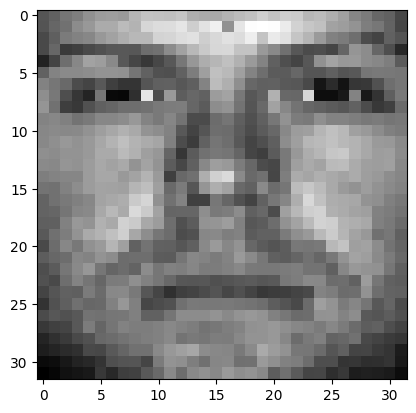

In [13]:
plt.imshow(X_train[0].reshape(32,32).T, cmap='gray')

In [14]:
mean_face = np.mean(X_train, axis=0)

(380, 1024)

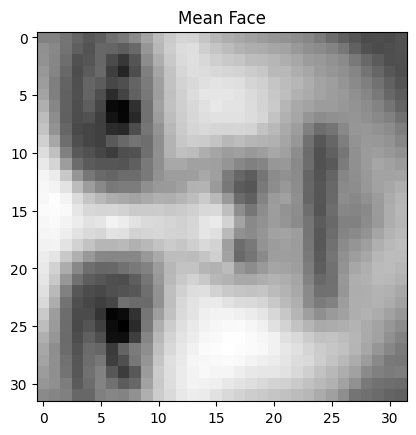

In [15]:
plt.imshow(mean_face.reshape(32,32), cmap='gray')
plt.title('Mean Face')

faces_norm = X_train - mean_face
faces_norm.shape

In [16]:
# Calculate covariance matrix
face_cov = np.cov(faces_norm.T) #np.cov expects features as rows and observations as columns, so transposed
face_cov.shape

(1024, 1024)

In [17]:
# Get eigenvectors
U, S, VT = np.linalg.svd(X_train, full_matrices=0)

In [18]:
# fig, axs = plt.subplots(1,3,figsize=(15,5))
# for i in np.arange(10):
#     ax = plt.subplot(2,5,i+1)
#     img = U[:,i].reshape(32,32)
#     plt.imshow(img, cmap='gray')
# fig.suptitle("First 10 Eigenfaces", fontsize=16)

In [19]:
n_components = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
for i in n_components:
    var = np.sum(S[:i])/np.sum(S)
    print(f"Amount of variance captured by first {i} eigenfaces: {var*100:.1f}")

Amount of variance captured by first 100 eigenfaces: 74.4
Amount of variance captured by first 150 eigenfaces: 83.3
Amount of variance captured by first 200 eigenfaces: 89.6
Amount of variance captured by first 250 eigenfaces: 94.0
Amount of variance captured by first 300 eigenfaces: 97.1
Amount of variance captured by first 350 eigenfaces: 99.3
Amount of variance captured by first 400 eigenfaces: 100.0
Amount of variance captured by first 450 eigenfaces: 100.0
Amount of variance captured by first 500 eigenfaces: 100.0
Amount of variance captured by first 550 eigenfaces: 100.0
Amount of variance captured by first 600 eigenfaces: 100.0
Amount of variance captured by first 650 eigenfaces: 100.0
Amount of variance captured by first 700 eigenfaces: 100.0
Amount of variance captured by first 750 eigenfaces: 100.0
Amount of variance captured by first 800 eigenfaces: 100.0
Amount of variance captured by first 850 eigenfaces: 100.0
Amount of variance captured by first 900 eigenfaces: 100.0
Amo

In [20]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA()

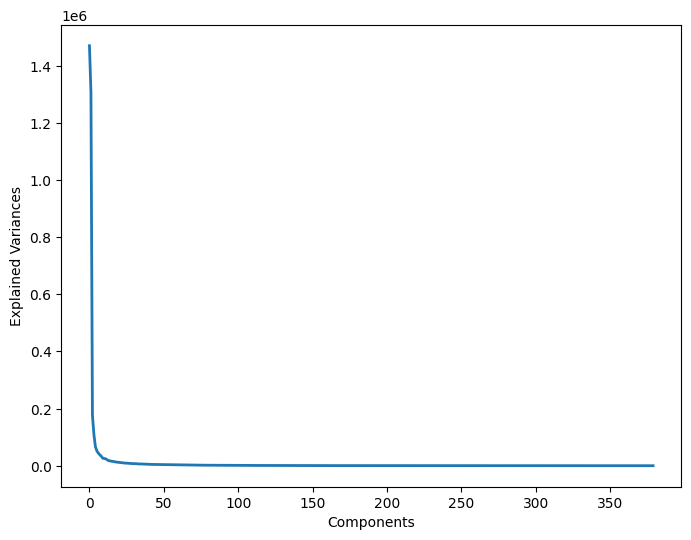

In [21]:
plt.figure(1, figsize=(8,6))
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variances')
plt.show()

In [22]:
n_components=90
pca = PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=90, whiten=True)

Text(0.5, 1.0, 'Average Face')

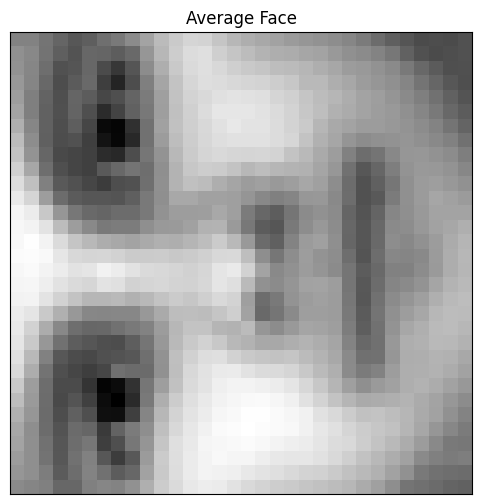

In [23]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
ax.imshow(pca.mean_.reshape((32,32)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

In [24]:
imgs = fea.reshape(2414,32,32)
imgs.shape

(2414, 32, 32)

Text(0.5, 0.98, 'All Eigen Faces')

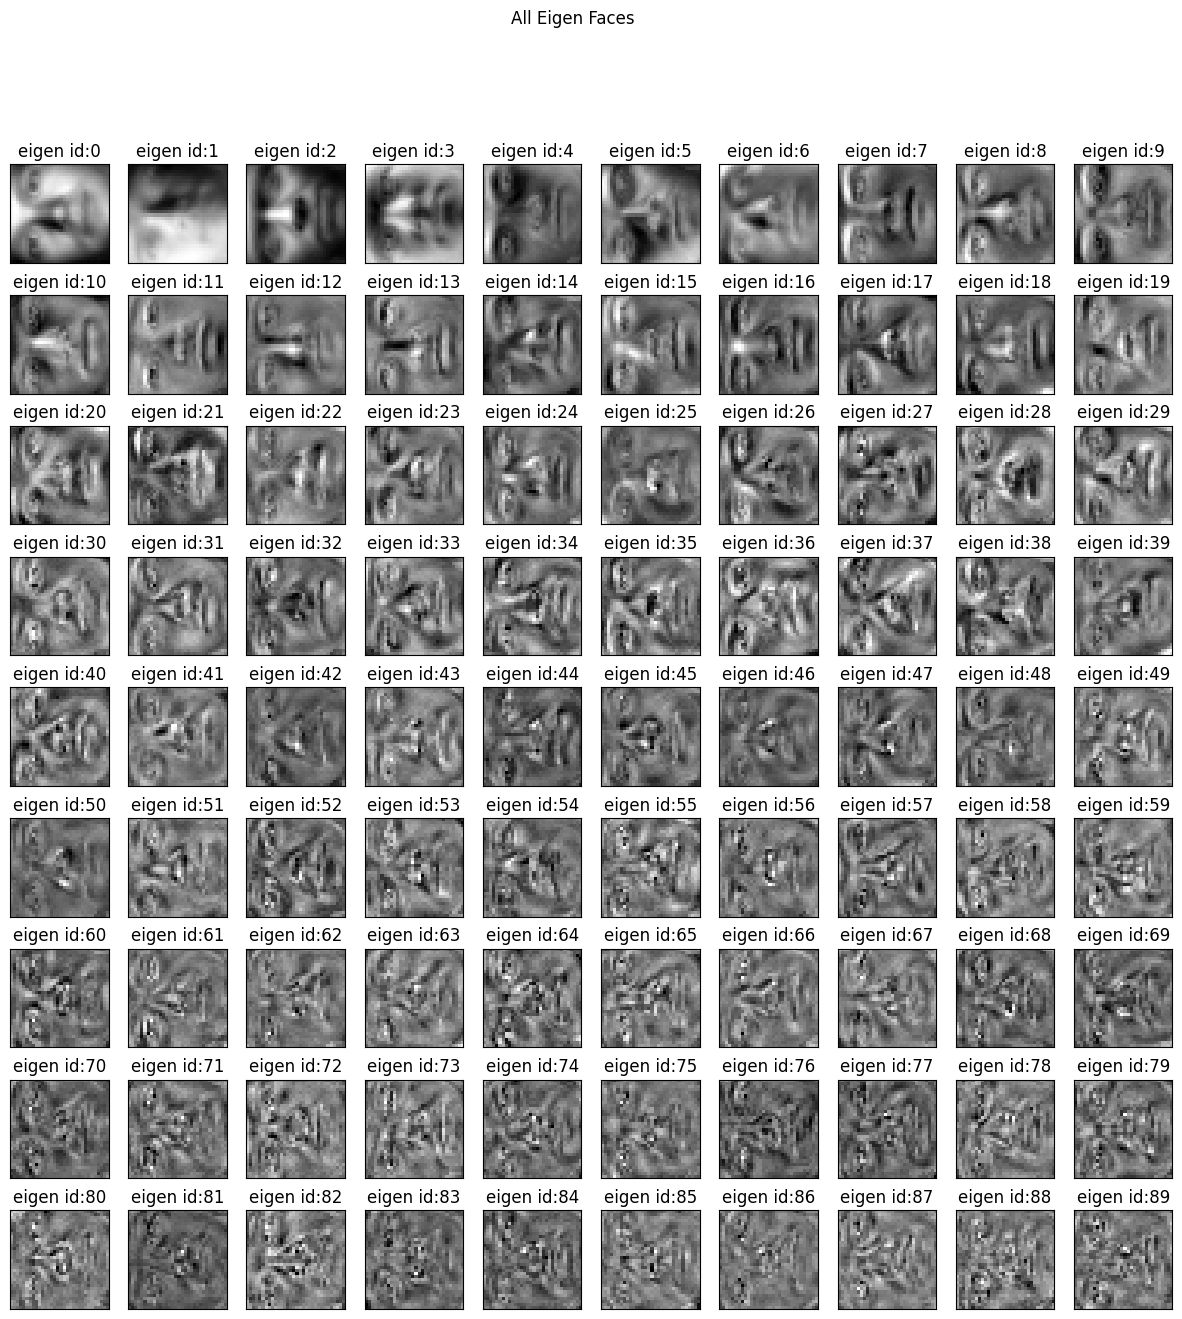

In [25]:
num_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((num_eigenfaces, imgs.shape[1], imgs.shape[1]))

cols=10
rows=int(num_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(num_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [26]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [27]:
print(X_train_pca.shape)
print(y_train.shape)
print(X_test_pca.shape)
print(X_test.shape)
print(y_test.shape)

(380, 90)
(380,)
(2158, 90)
(2158, 1024)
(2158,)


In [28]:
M =  np.array([10,20,30,40,50])
E_pca = {}
for m in M:
    X_train, y_train, X_test, y_test = train_test_select(data, m=m)
    X_train_pca=pca.transform(X_train)
    X_test_pca=pca.transform(X_test)
    E_pca[m] = knn_classifier(X_train_pca, y_train, X_test_pca, y_test, k=1)    

Accuracy: 0.8086190917516218
Classification Error : 0.19138090824837817
Accuracy: 0.9003707136237257
Classification Error : 0.09962928637627433
Accuracy: 0.9207599629286376
Classification Error : 0.0792400370713624
Accuracy: 0.9564411492122336
Classification Error : 0.043558850787766445
Accuracy: 0.9768303985171455
Classification Error : 0.023169601482854518


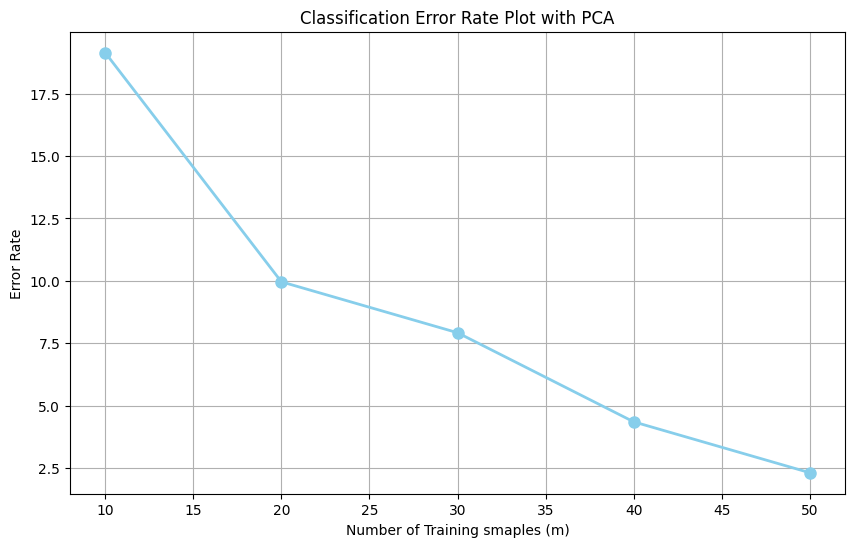

In [29]:
plot_err(E_pca, title='Classification Error Rate Plot with PCA')

#### LDA

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [31]:
lda = LinearDiscriminantAnalysis(solver='eigen')
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(solver='eigen')

In [32]:
# Get explained variance ratio
explained_variance = lda.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

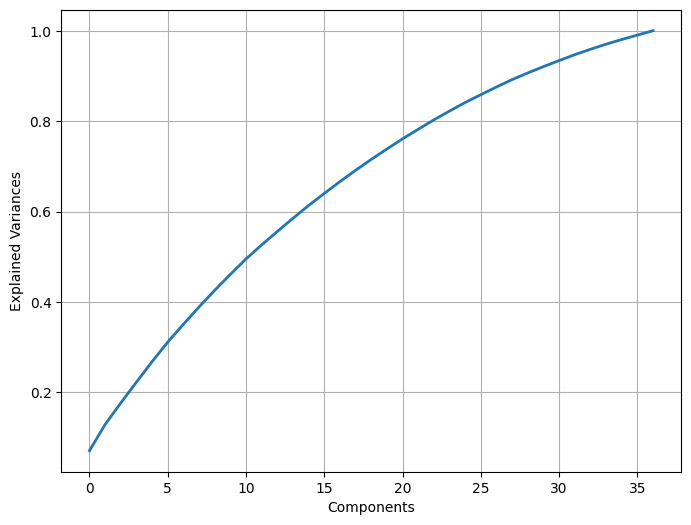

In [33]:
plt.figure(1, figsize=(8,6))
plt.plot(cumulative_variance, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variances')
plt.grid()
plt.show()

In [34]:
# Choosing number of components 35 from above plot
lda = LinearDiscriminantAnalysis(n_components=35)

In [35]:
M =  np.array([10,20,30,40,50])
E_lda = {}
for m in M:
    X_train, y_train, X_test, y_test = train_test_select(data, m=m)
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda  = lda.transform(X_test)
    E_lda[m] = knn_classifier(X_train_lda, y_train, X_test_lda, y_test, k=1) 

Accuracy: 0.8063021316033364
Classification Error : 0.1936978683966636
Accuracy: 0.9059314179796107
Classification Error : 0.09406858202038926
Accuracy: 0.8498609823911029
Classification Error : 0.15013901760889714
Accuracy: 0.9675625579240037
Classification Error : 0.0324374420759963
Accuracy: 0.9893419833178869
Classification Error : 0.01065801668211308


Reference Values:  
Accuracy: 0.7882298424467099  
Classification Error : 0.2117701575532901  
Accuracy: 0.8952734012974977  
Classification Error : 0.10472659870250234  
Accuracy: 0.8544949026876738  
Classification Error : 0.1455050973123262  
Accuracy: 0.9772937905468025  
Classification Error : 0.022706209453197457  
Accuracy: 0.9935125115848007  
Classification Error : 0.006487488415199305  

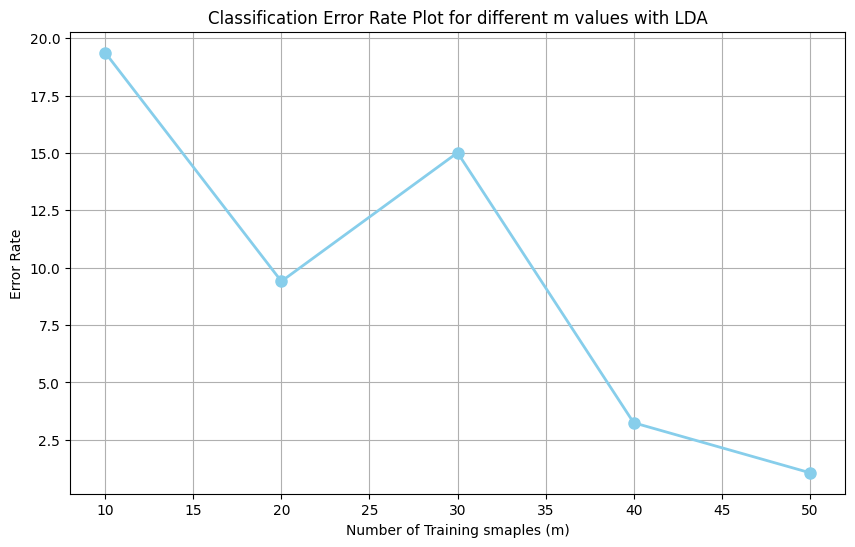

In [36]:
plot_err(E_lda, title='Classification Error Rate Plot for different m values with LDA')

#### SVM

In [37]:
from sklearn.decomposition import DictionaryLearning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import DictionaryLearning, PCA
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.optimize import linprog
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [38]:
# Train a SVM classification model
print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf = clf.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)


In [39]:
def svm_cls(X_train_pca, y_train, X_test_pca, y_test):
    # Predicting people's names on the test set
    svm = SVC(kernel='rbf', class_weight='balanced', C=1000, gamma=0.01)
    svm.fit(X_train_pca, y_train)
    accuracy = svm.score(X_test_pca, y_test)
    classification_error = 1 - accuracy
    err_rate = classification_error * 100
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Classification Error : {classification_error:.2f}')
    return (err_rate)

In [40]:
M =  np.array([10,20,30,40,50])
E_svm = {}
for m in M:
    X_train, y_train, X_test, y_test = train_test_select(data, m=m)
    X_train_pca=pca.transform(X_train)
    X_test_pca=pca.transform(X_test)
    E_svm[m] = svm_cls(X_train_pca, y_train, X_test_pca, y_test)    

Accuracy: 0.83
Classification Error : 0.17
Accuracy: 0.92
Classification Error : 0.08
Accuracy: 0.95
Classification Error : 0.05
Accuracy: 0.97
Classification Error : 0.03
Accuracy: 0.99
Classification Error : 0.01


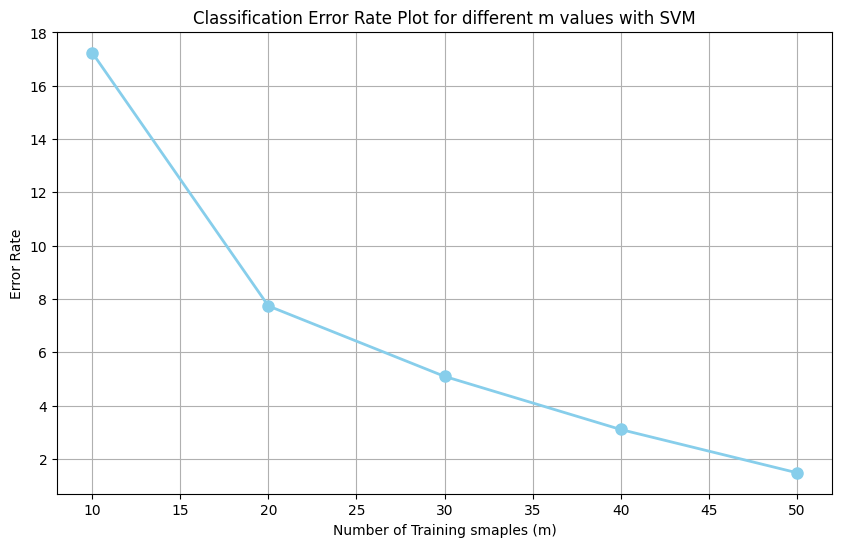

In [41]:
plot_err(E_svm, title='Classification Error Rate Plot for different m values with SVM')

#### SRC

In [83]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Lasso

# # Define a range of alpha values
# alpha_values = np.logspace(-3, 1, 10)  # Exponential scale from 0.001 to 10

# # Use GridSearchCV to find the best alpha
# param_grid = {'alpha': alpha_values}
# lasso = Lasso(max_iter=1000)
# grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train_pca, y_train)

# # Best alpha
# best_alpha = grid_search.best_params_['alpha']
# print(f"Best alpha for Lasso: {best_alpha}")

In [84]:
# # Selecting the right alpha value with cross-validation with dictionary learning
# # Test a range of alpha values
# alpha_values = np.logspace(-3, 1, 10)
# best_alpha = None
# best_score = 0

# for alpha in alpha_values:
#     dictionary = DictionaryLearning(n_components=200, alpha=alpha, max_iter=500)
#     X_train_dict = dictionary.fit_transform(X_train_pca)  # Transform training data
    
#     # Evaluate using cross-validation
#     scores = cross_val_score(Lasso(alpha=0.1), X_train_dict, y_train, cv=5, scoring='accuracy')
#     mean_score = np.mean(scores)
    
#     if mean_score > best_score:
#         best_score = mean_score
#         best_alpha = alpha

# print(f"Best alpha for Dictionary Learning: {best_alpha}")

In [85]:
# def dict_learn(X_train, X_test):
#     # Standardize the features
#     scaler = StandardScaler()
#     X_train = scaler.fit_transform(X_train)
#     X_test = scaler.transform(X_test)
    
#     # Apply PCA for dimensionality reduction
#     pca = PCA(n_components=100)  # Reduce to 100 principal components
#     X_train_pca = pca.fit_transform(X_train)
#     X_test_pca = pca.transform(X_test)
    
#     # Train Dictionary Learning Model
#     dictionary = DictionaryLearning(n_components=200, alpha=1.0, max_iter=500)  # Learn 200 atoms
#     X_train_dict = dictionary.fit_transform(X_train_pca)  # Learn sparse representation
#     X_test_dict = dictionary.transform(X_test_pca)  # Transform test samples

#     return (X_train_dict, X_test_dict)

In [86]:
# # Train SRC Classifier using L1-minimization (Lasso)
# def src(X_train_dict, y_train, X_test_dict, y_test):
#     unique_classes = np.unique(y_train)
#     predictions = []
    
#     for test_sample in X_test_dict:
#         residual_errors = {}
        
#         for cls in unique_classes:
#             # Get dictionary coefficients for the current class
#             X_cls = X_train_dict[y_train == cls]
            
#             # Solve sparse representation using Lasso (L1 minimization)
#             lasso = Lasso(alpha=0.1, max_iter=500)
#             lasso.fit(X_cls.T, test_sample)  # Train only on class samples
            
#             # Compute residual error
#             residual_error = np.linalg.norm(test_sample - X_cls.T @ lasso.coef_)
#             residual_errors[cls] = residual_error
        
#         # Predict class with minimum residual error
#         predictions.append(min(residual_errors, key=residual_errors.get))
        
#     y_pred = predictions
#     accuracy = accuracy_score(y_test, y_pred)
#     classification_error = 1 - accuracy
#     err_rate = classification_error * 100
#     print(f'Accuracy: {accuracy:.2f}')
#     print(f'Classification Error : {classification_error:.2f}')
#     return (err_rate)
    
#  # return np.array(predictions)

In [42]:
from sklearn.decomposition import PCA, DictionaryLearning, MiniBatchDictionaryLearning
from sklearn.pipeline import Pipeline

def dict_learn_optimized(X_train, X_test, use_mini_batch=True):
    """
    Function to learn a dictionary-based sparse representation with PCA preprocessing.

    Parameters:
        X_train (ndarray): Training data.
        X_test (ndarray): Test data.
        use_mini_batch (bool): Use MiniBatchDictionaryLearning for large datasets.

    Returns:
        X_train_dict, X_test_dict: Sparse representations of training and test data.
    """
    # Apply PCA for dimensionality reduction (Retain 99% variance)
    pca = PCA(n_components=0.99)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Standardize the PCA-transformed features
    scaler = StandardScaler()
    X_train_pca = scaler.fit_transform(X_train_pca)
    X_test_pca = scaler.transform(X_test_pca)

    # Choose Dictionary Learning model
    if use_mini_batch:
        dictionary = MiniBatchDictionaryLearning(n_components=300, alpha=0.5, batch_size=100, max_iter=1000)
    else:
        dictionary = DictionaryLearning(n_components=300, alpha=0.5, max_iter=1000)

    # Train dictionary and transform data
    X_train_dict = dictionary.fit_transform(X_train_pca)
    X_test_dict = dictionary.transform(X_test_pca)

    return X_train_dict, X_test_dict


In [43]:
def src_optimized(X_train_dict, y_train, X_test_dict, y_test, alpha=0.01):
    unique_classes = np.unique(y_train)
    predictions = []

    # Convert to NumPy arrays for faster computation
    X_train_dict = np.array(X_train_dict)
    X_test_dict = np.array(X_test_dict)
    y_train = np.array(y_train)

    # Solve sparse representation using Lasso for all test samples
    lasso = Lasso(alpha=alpha, max_iter=5000)  # Increased iterations

    for test_sample in X_test_dict:
        # Solve Lasso to get sparse representation across all training samples
        lasso.fit(X_train_dict.T, test_sample)  
        coef = lasso.coef_  # Sparse coefficients

        # Compute residual errors for each class efficiently
        residual_errors = {
            cls: np.linalg.norm(test_sample - X_train_dict[y_train == cls].T @ coef[y_train == cls])
            for cls in unique_classes
        }

        # Predict class with minimum residual error
        predictions.append(min(residual_errors, key=residual_errors.get))

    # Compute accuracy
    y_pred = np.array(predictions)
    accuracy = accuracy_score(y_test, y_pred)
    err_rate = (1 - accuracy) * 100

    print(f'Accuracy: {accuracy:.2f}')
    print(f'Classification Error: {1 - accuracy:.2f}')
    return err_rate


In [44]:
M =  np.array([10,20,30,40,50])
E_src = {}
for m in M:
    X_train_dict, X_test_dict = dict_learn_optimized(X_train, X_test)
    E_src[m] = src_optimized(X_train_dict, y_train, X_test_dict, y_test) 

Accuracy: 0.99
Classification Error: 0.01
Accuracy: 0.99
Classification Error: 0.01
Accuracy: 0.99
Classification Error: 0.01
Accuracy: 0.99
Classification Error: 0.01
Accuracy: 0.99
Classification Error: 0.01


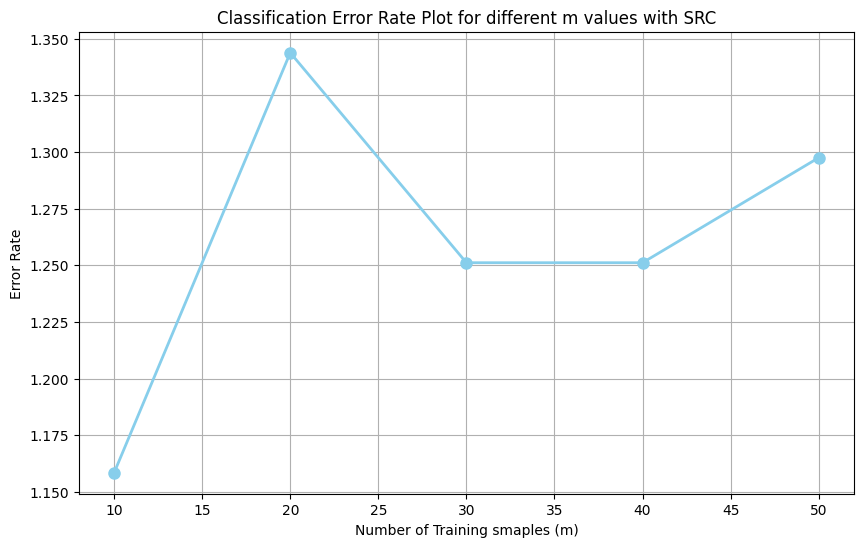

In [45]:
plot_err(E_src, title='Classification Error Rate Plot for different m values with SRC')

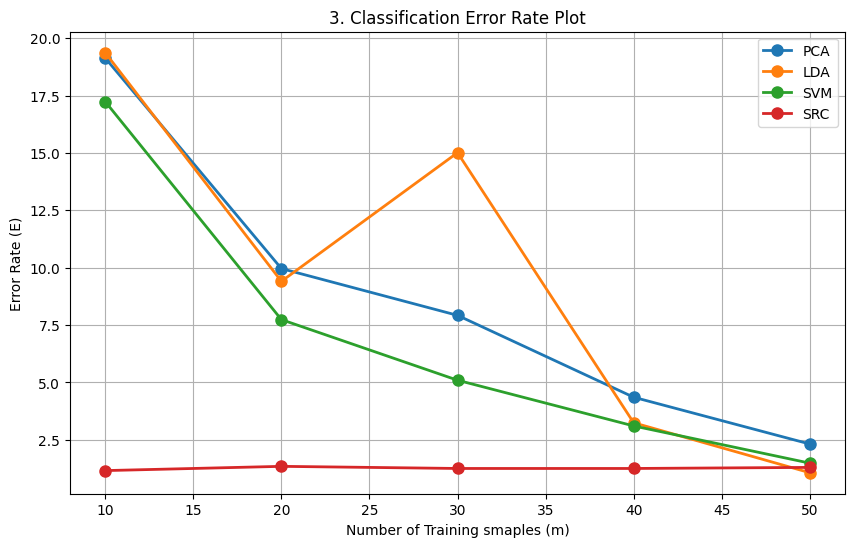

In [47]:
plt.figure(figsize=(10,6))
plt.plot(list(E_pca.keys()),list(E_pca.values()), marker='o', label='PCA', linestyle='-', linewidth=2, markersize=8)
plt.plot(list(E_lda.keys()),list(E_lda.values()), marker='o', label='LDA', linestyle='-', linewidth=2, markersize=8)
plt.plot(list(E_svm.keys()),list(E_svm.values()), marker='o', label='SVM', linestyle='-', linewidth=2, markersize=8)
plt.plot(list(E_src.keys()),list(E_src.values()), marker='o', label='SRC', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Number of Training smaples (m)')
plt.ylabel('Error Rate (E)')
plt.title("3. Classification Error Rate Plot")
plt.legend()
plt.grid(True)
plt.savefig('error_plot_3.png', bbox_inches='tight')
plt.show()